In [343]:
# IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt

In [411]:
# SAVE KAPRSAC JET FUEL PRICES IN A DATAFRAME
df_org = pd.read_csv("KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set
df = df_org.copy() 

In [412]:
# PRELIMINARY STATS:
df.describe()

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
count,7626.000000
mean,1.407106
std,0.897850
min,0.282000
25%,0.581000
50%,1.199000
75%,2.007750
max,4.814000


In [413]:
# CLEAN UP DATA TO PERFORM GROUPBY ANALYSIS
df['YEAR'] = df['Date'].astype(str).str[0:4]
df = df[df['YEAR'].astype(int) >= 2010] # filters only years from 2010 to 2020
df['MONTH'] = df['Date'].astype(str).str[5:7]
df['DAY'] = df['Date'].astype(str).str[8:10]
del df['Date']

In [414]:
#CHANGE NUMERICAL MONTH TO MONTHS
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}

In [415]:
df['MONTH'] = df['MONTH'].apply(lambda x: month_lookup[x])

In [416]:
df['MONTH YEAR'] = df['MONTH'] + ' ' +  df['YEAR']
df.set_index('MONTH YEAR')

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,DAY
MONTH YEAR,,,,
August 2012,3.123,2012,August,07
August 2012,3.051,2012,August,05
August 2012,2.939,2012,August,01
July 2012,2.914,2012,July,30
July 2012,2.934,2012,July,15
...,...,...,...,...
September 2012,3.218,2012,September,05
August 2012,3.225,2012,August,26
August 2012,3.162,2012,August,19


In [417]:
# FIND MEAN OF THESE PRICES
jet_fuel = df.groupby(['MONTH YEAR']).mean()

In [310]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('USCarrier_Traffic_DOM.csv', sep='","', engine='python', skiprows=1)
dom_flight.drop(dom_flight.tail(1).index,inplace=True) # drop last column

In [311]:
# RENAME COLUMNS
dom_flight.index.name = 'Period'
dom_flight.rename(columns={'Unit: (000)': 'Total(DOM)'}, inplace=True)

In [312]:
# CLEANUP DATA
dom_flight['PERIOD'] = dom_flight.index
dom_flight['PERIOD'] = dom_flight['PERIOD'].astype(str).str[1:]
dom_flight.set_index('PERIOD')
dom_flight['Total(DOM)'] = dom_flight['Total(DOM)'].astype(str).str[:-1]

In [313]:
dom_flight.set_index('PERIOD', inplace=True)

In [315]:
dom_flight.head()

,Total(DOM)
PERIOD,
July 2010,798813
August 2010,799094
September 2010,733875
October 2010,749822
November 2010,714897


In [316]:
# IMPORT BTS INTERNATIONAL DATA DEPARTURES PERFORMED
intl_flight = pd.read_csv('USCarrier_Traffic_INTL.csv', sep='","', engine='python', skiprows=1)
intl_flight.drop(intl_flight.tail(1).index,inplace=True)

In [317]:
# RENAME COLUMNS
intl_flight.index.name = 'Period'
intl_flight.rename(columns={'Unit: (000)': 'Total(INTL)'}, inplace=True)

In [318]:
# CLEANUP DATA
intl_flight['PERIOD'] = intl_flight.index
intl_flight['PERIOD'] = intl_flight['PERIOD'].astype(str).str[1:]
intl_flight.set_index('PERIOD')
intl_flight['Total(INTL)'] = intl_flight['Total(INTL)'].astype(str).str[:-1]

In [319]:
intl_flight.set_index('PERIOD', inplace=True)

In [320]:
intl_flight.head()

,Total(INTL)
PERIOD,
July 2010,81903
August 2010,78229
September 2010,64405
October 2010,66413
November 2010,64579


In [335]:
# CREATE COMBINED FLIGHT DATAFRAME
combined_flight = dom_flight.copy()

In [336]:
combined_flight['Total(INTL)'] = intl_flight['Total(INTL)']

In [341]:
combined_flight['TOTAL'] = combined_flight['Total(DOM)'].astype(int) + combined_flight['Total(INTL)'].astype(int)

In [342]:
combined_flight

,Total(DOM),Total(INTL),TOTAL
PERIOD,,,
July 2010,798813,81903,880716
August 2010,799094,78229,877323
September 2010,733875,64405,798280
October 2010,749822,66413,816235
November 2010,714897,64579,779476
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


In [351]:
# OIL PRICES BY MONTH AND YEAR
oil_prices = df.groupby(['YEAR', 'MONTH']).mean()

In [352]:
oil_prices

U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
YEAR MONTH                                                                                     
2010 April                                              2.242900                               
     August                                             2.081957                               
     December                                           2.456952                               
     February                                           2.001056                               
     January                                            2.047500                               
...                                                          ...                               
2020 January                                            1.769727                               
     July                                               1.056000                               
     June                                               0.989818                               
     March                                              0.940130                               
     May                                                0.704650                               

[127 rows x 1 columns]

In [434]:
# TIME SERIES
import datetime
df2 = pd.read_csv("KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set

In [435]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [436]:
df2 = df2[df2['Date'].astype(str).str[0:4].astype(int) >= 2010]

In [437]:
df2

,Date,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
381,2012-08-07 20:00:00-04:00,3.123
382,2012-08-05 20:00:00-04:00,3.051
383,2012-08-01 20:00:00-04:00,2.939
384,2012-07-30 20:00:00-04:00,2.914
385,2012-07-15 20:00:00-04:00,2.934
...,...,...
7621,2012-09-05 20:00:00-04:00,3.218
7622,2012-08-26 20:00:00-04:00,3.225
7623,2012-08-19 20:00:00-04:00,3.162
7624,2012-08-16 20:00:00-04:00,3.163


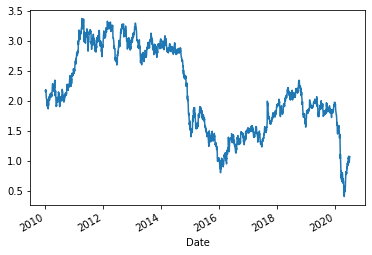

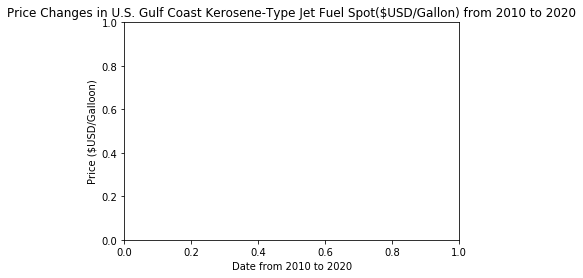

<Figure size 432x288 with 0 Axes>

In [454]:
ax = plt.gca()
fig=plt.figure()
df2.plot(kind='line', x='Date', y='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon', ax=ax)

# FORMATTING:
plt.title('Price Changes in U.S. Gulf Coast Kerosene-Type Jet Fuel Spot($USD/Gallon) from 2010 to 2020')
plt.xlabel('Date from 2010 to 2020')
plt.ylabel('Price ($USD/Galloon)')
ax.get_legend().remove()
plt.savefig('price-changes-2010to2020.png', bbox_inches='tight')

plt.show()
plt.draw()

<Figure size 432x288 with 0 Axes>